In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esophageal-cancer/Esophageal_Dataset new.csv


In [2]:
df = pd.read_csv("/kaggle/input/esophageal-cancer/Esophageal_Dataset new.csv")

In [3]:
df.head()

,country_of_procurement,patient_barcode,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,days_to_birth,gender,height,weight
0,0,TCGA-XP-A8T6,XP,A8T6,F4CB24E9-E7FD-4245-9C9B-7E0934038446,YES,C15.5,8070/3,C15.5,0,0,-19886,MALE,0.0,70.0
1,0,TCGA-XP-A8T8,XP,A8T8,8D3CCAF0-872A-4EE3-B4B7-847180FEC3AB,YES,C15.5,8070/3,C15.5,NO,YES,-18048,MALE,0.0,62.0
2,0,77159f97-d316-41c8-bdab-43d8f0ba4e92,XP,A8T6,F4CB24E9-E7FD-4245-9C9B-7E0934038446,YES,C15.5,8070/3,C15.5,0,0,-19818,MALE,0.0,65.0
3,0,d14889ab-d6b7-4c4e-87dd-58860cee83b0,XP,A8T8,8D3CCAF0-872A-4EE3-B4B7-847180FEC3AB,YES,C15.5,8070/3,C15.5,NO,YES,-18113,MALE,0.0,64.0
4,0,1c527555-500e-4f0b-b55e-e735d9ea092e,XP,A8T6,F4CB24E9-E7FD-4245-9C9B-7E0934038446,YES,C15.5,8070/3,C15.5,0,0,-19969,MALE,0.0,70.0


In [4]:
df.columns

Index(['country_of_procurement', 'patient_barcode', 'tissue_source_site',
       'patient_id', 'bcr_patient_uuid', 'informed_consent_verified',
       'icd_o_3_site', 'icd_o_3_histology', 'icd_10',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'days_to_birth', 'gender',
       'height', 'weight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country_of_procurement                     3985 non-null   object 
 1   patient_barcode                            3985 non-null   object 
 2   tissue_source_site                         3985 non-null   object 
 3   patient_id                                 3985 non-null   object 
 4   bcr_patient_uuid                           3985 non-null   object 
 5   informed_consent_verified                  3985 non-null   object 
 6   icd_o_3_site                               3985 non-null   object 
 7   icd_o_3_histology                          3985 non-null   object 
 8   icd_10                                     3985 non-null   object 
 9   tissue_prospective_collection_indicator    3985 non-null   object 
 10  tissue_retrospective_col

In [9]:
df["icd_10"].unique()

array(['C15.5', 'C15.4', 'C16.0', 'C15.9', 'C15.3'], dtype=object)

In [10]:
df.isnull().sum()

country_of_procurement                       0
patient_barcode                              0
tissue_source_site                           0
patient_id                                   0
bcr_patient_uuid                             0
informed_consent_verified                    0
icd_o_3_site                                 0
icd_o_3_histology                            0
icd_10                                       0
tissue_prospective_collection_indicator      0
tissue_retrospective_collection_indicator    0
days_to_birth                                0
gender                                       0
height                                       0
weight                                       0
dtype: int64

In [11]:
df_new = df.copy()

In [18]:
df_new.drop(columns=['patient_barcode', 'patient_id'], inplace=True)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country_of_procurement                     3985 non-null   object 
 1   tissue_source_site                         3985 non-null   object 
 2   bcr_patient_uuid                           3985 non-null   object 
 3   informed_consent_verified                  3985 non-null   object 
 4   icd_o_3_site                               3985 non-null   object 
 5   icd_o_3_histology                          3985 non-null   object 
 6   icd_10                                     3985 non-null   object 
 7   tissue_prospective_collection_indicator    3985 non-null   object 
 8   tissue_retrospective_collection_indicator  3985 non-null   object 
 9   days_to_birth                              3985 non-null   int64  
 10  gender                  

In [30]:
def classify_features(df_new):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [21]:
categorical, non_categorical, discrete, continuous = classify_features(df_new)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_30/4256989140.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], bins = 20, kde = True, palette='hls')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


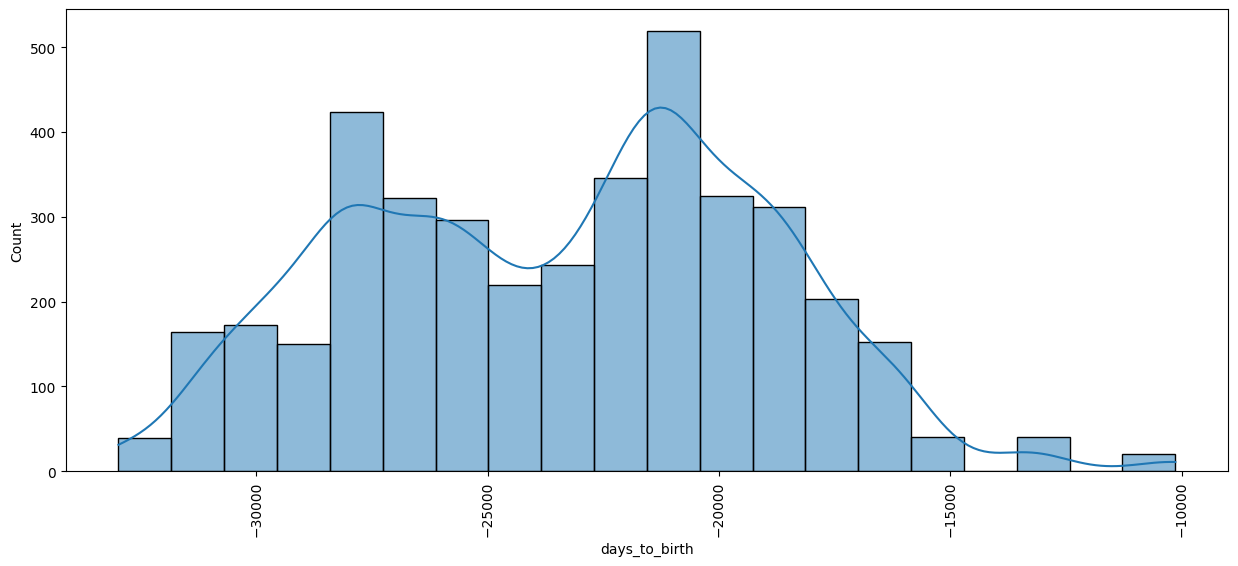

/tmp/ipykernel_30/4256989140.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], bins = 20, kde = True, palette='hls')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


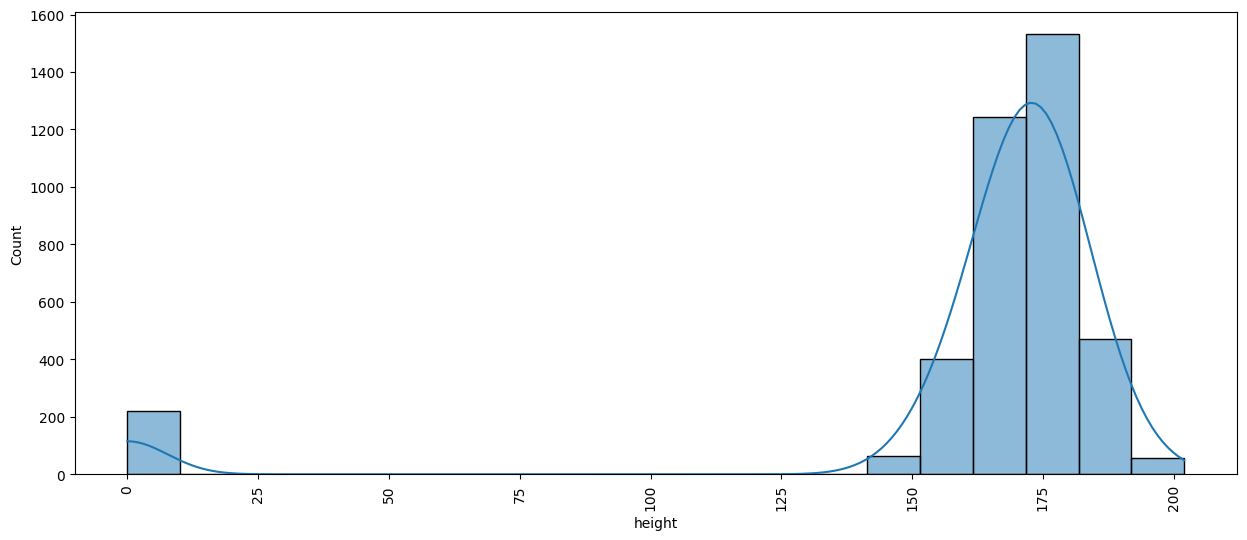

/tmp/ipykernel_30/4256989140.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[i], bins = 20, kde = True, palette='hls')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


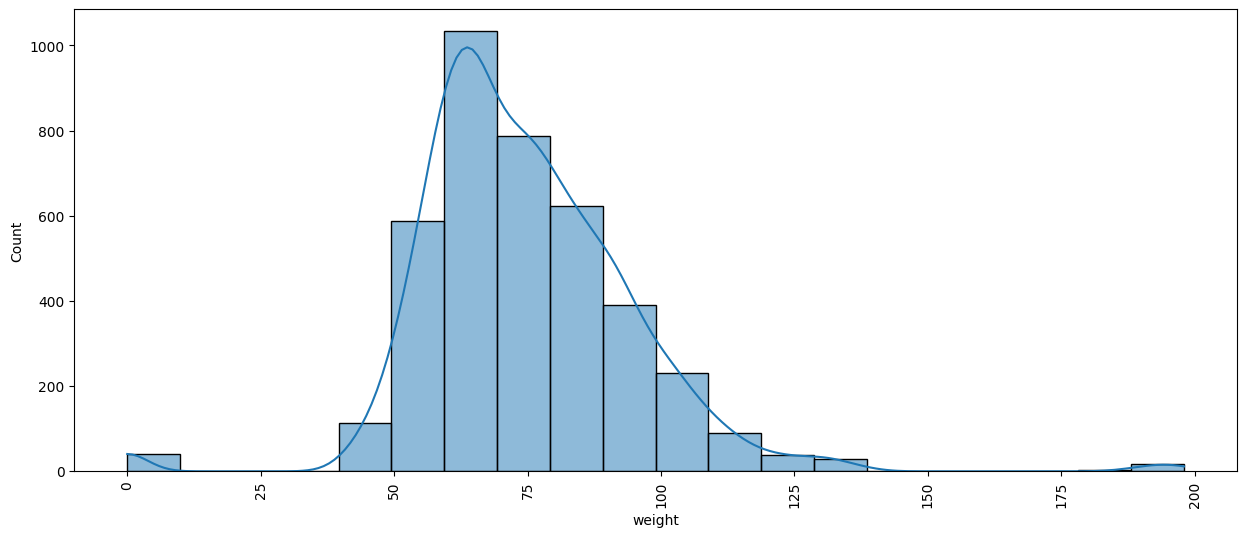

In [25]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

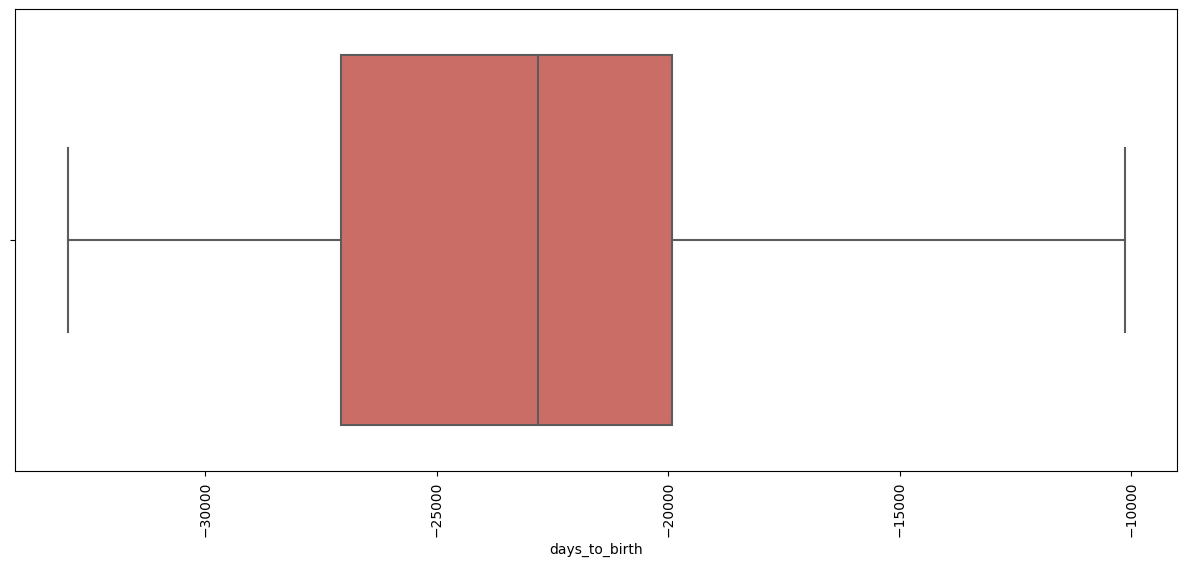

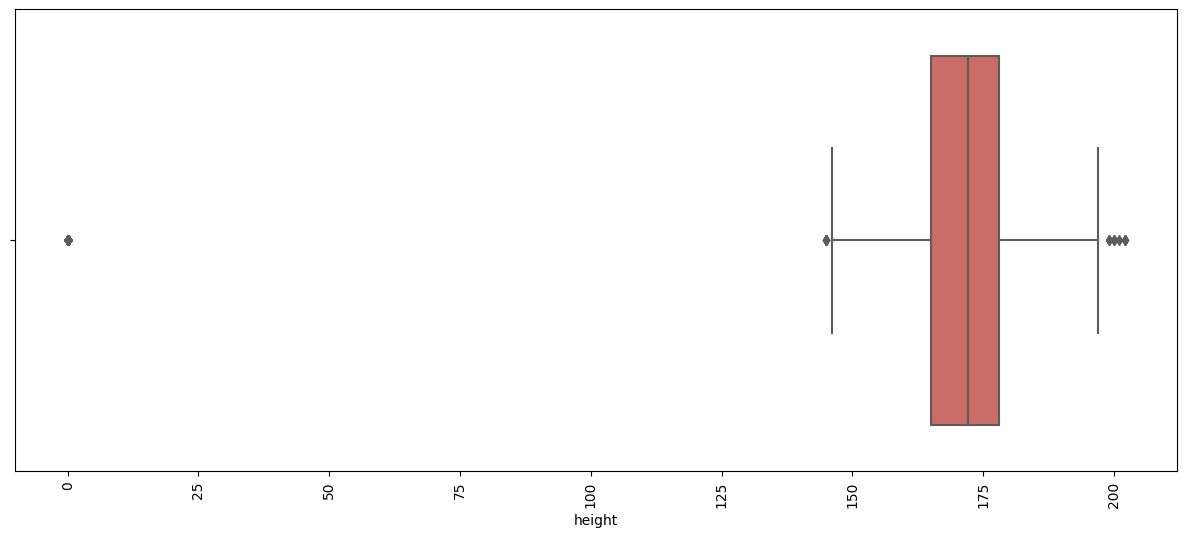

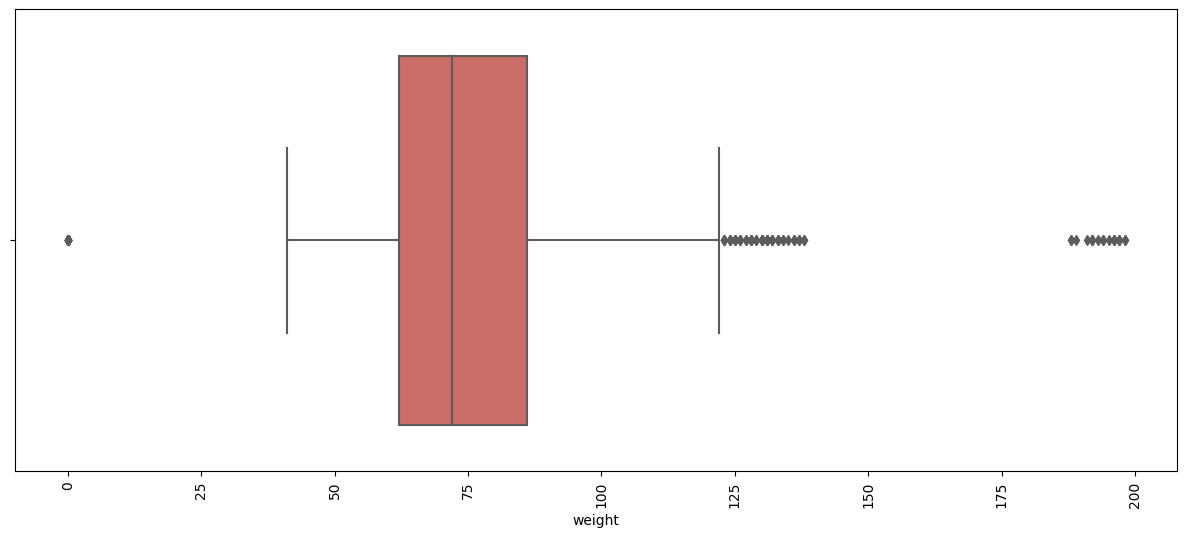

In [26]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

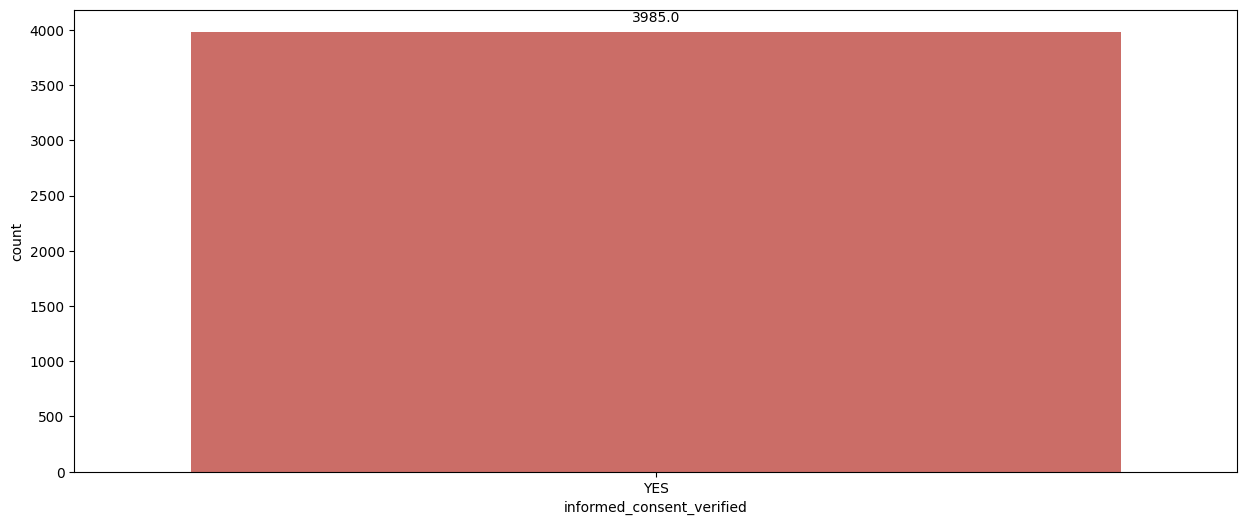

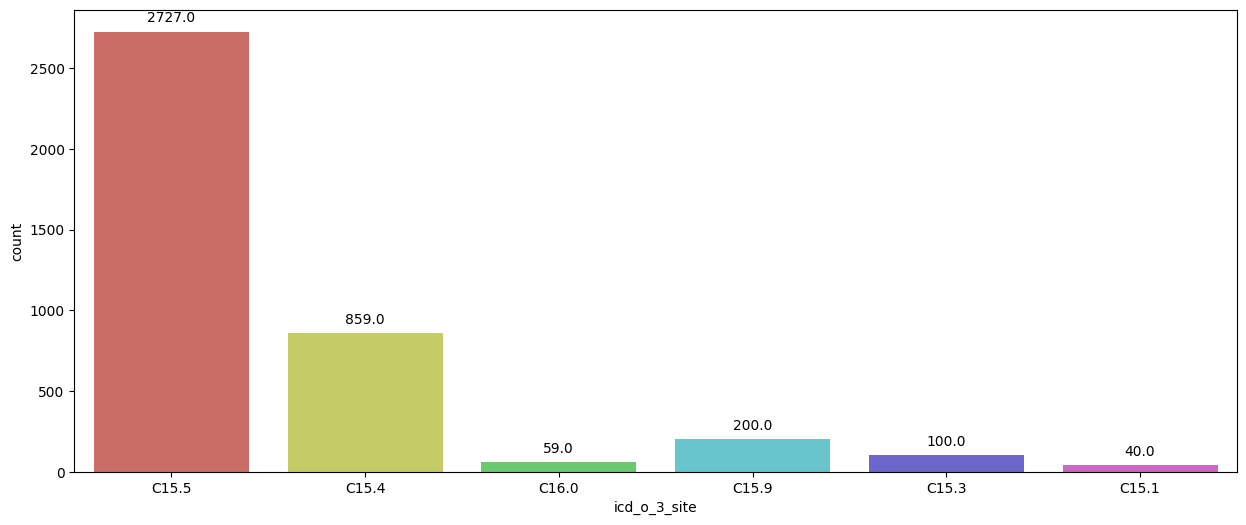

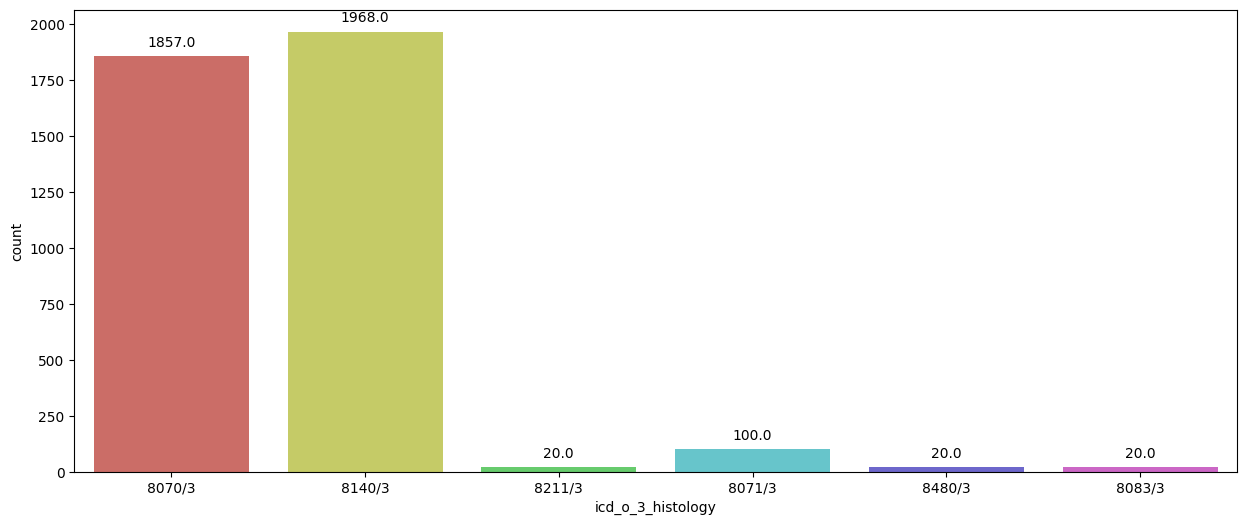

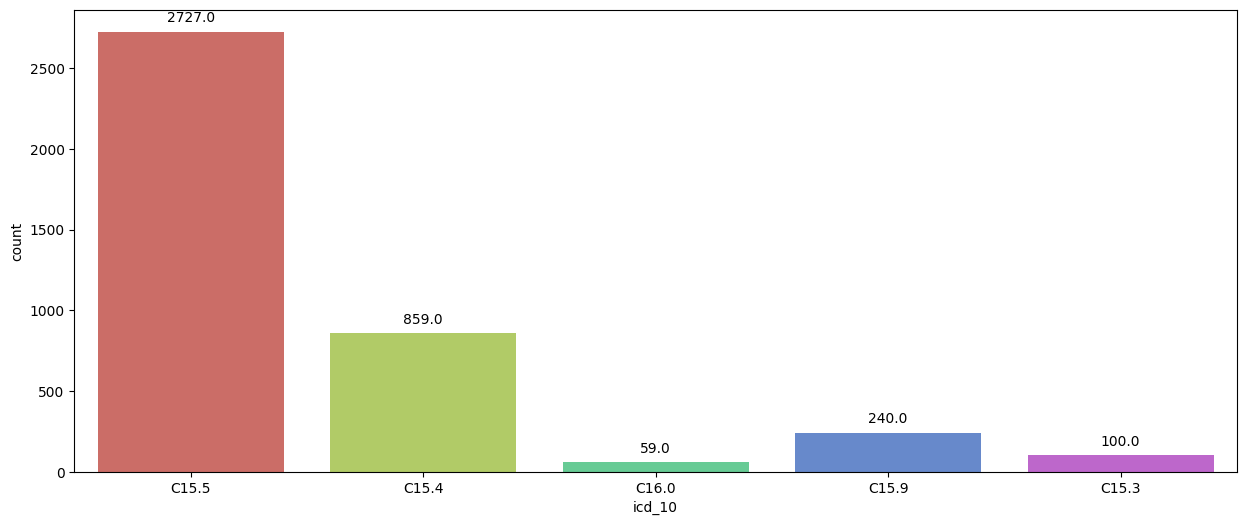

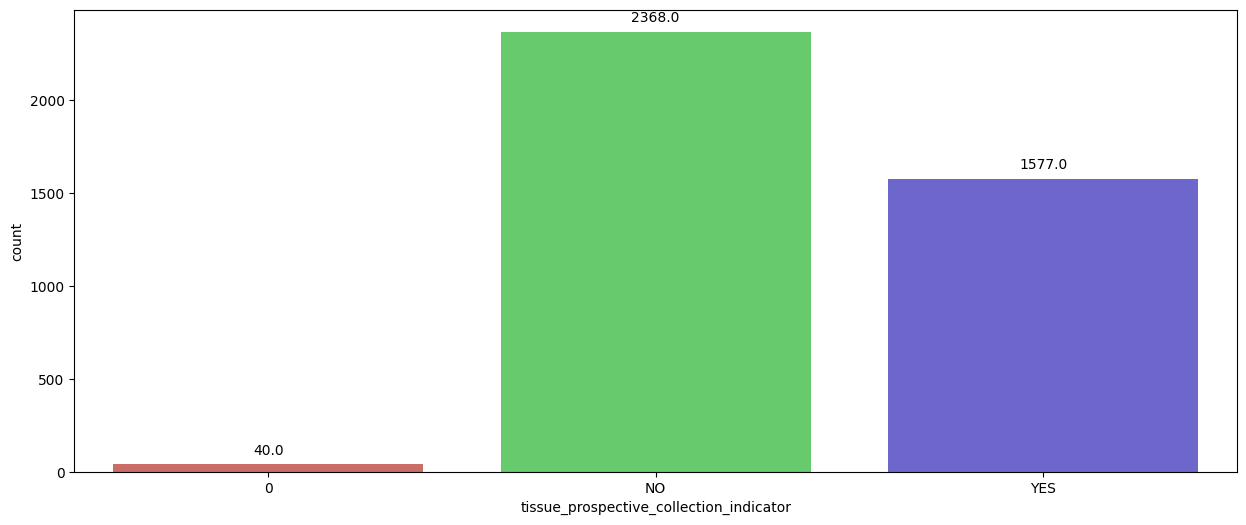

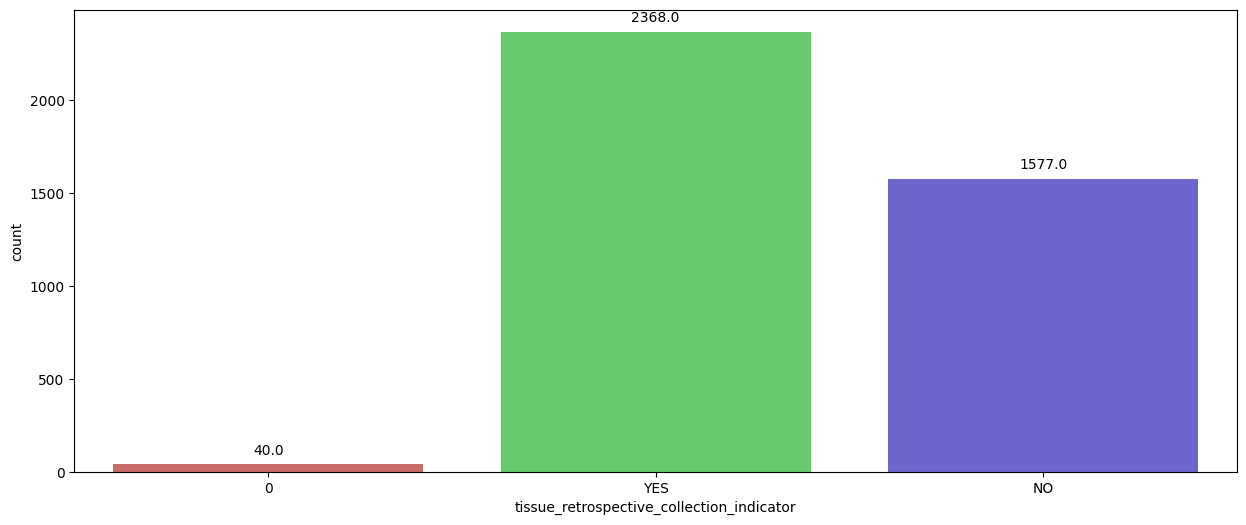

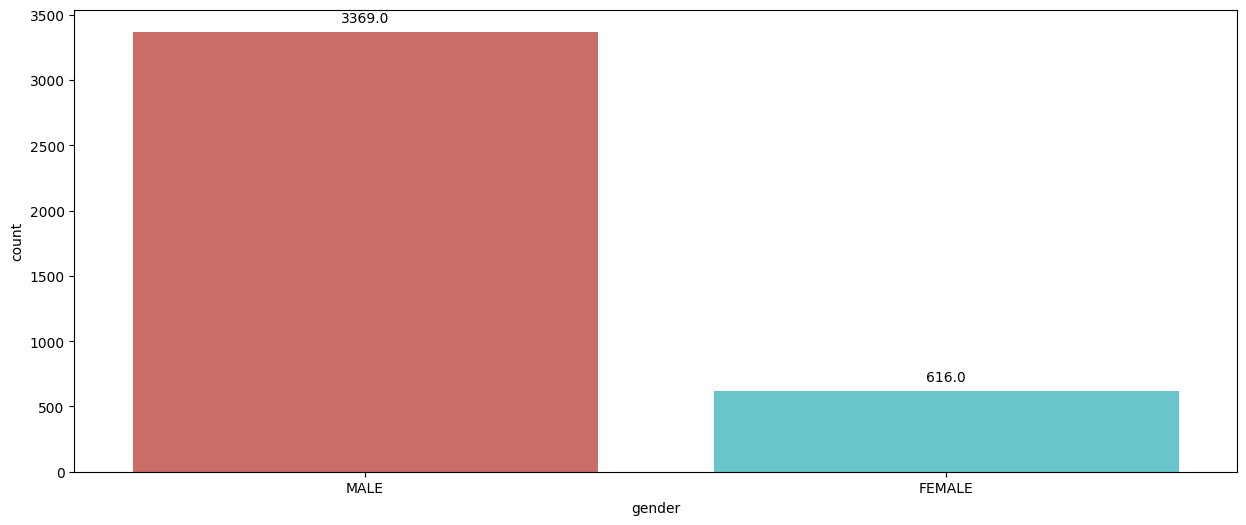

In [37]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object

encoder = LabelEncoder()

df_encoded = df_new

# Iterate over each column in the DataFrame

for col in df_encoded.select_dtypes(include=['object']).columns:
    encoder.fit(df_encoded[col])
    df_encoded[col] = encoder.transform(df_encoded[col])


In [41]:
df_encoded.head()

,country_of_procurement,tissue_source_site,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,days_to_birth,gender,height,weight
0,0,16,178,0,3,0,2,0,0,-19886,1,0.0,70.0
1,0,16,94,0,3,0,2,1,2,-18048,1,0.0,62.0
2,0,16,178,0,3,0,2,0,0,-19818,1,0.0,65.0
3,0,16,94,0,3,0,2,1,2,-18113,1,0.0,64.0
4,0,16,178,0,3,0,2,0,0,-19969,1,0.0,70.0


In [48]:
df_encoded.columns

Index(['country_of_procurement', 'tissue_source_site', 'bcr_patient_uuid',
       'informed_consent_verified', 'icd_o_3_site', 'icd_o_3_histology',
       'icd_10', 'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'days_to_birth', 'gender',
       'height', 'weight'],
      dtype='object')

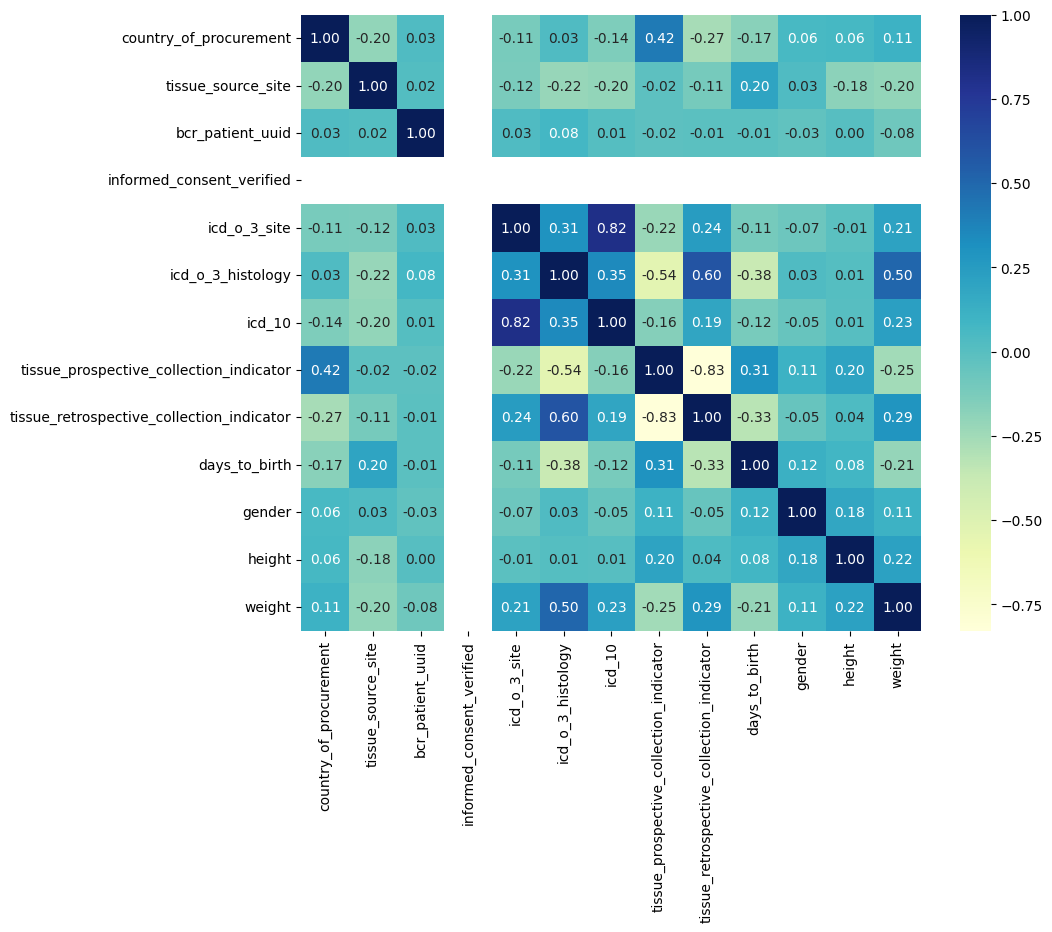

In [47]:
corr = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

In [188]:
selected_features = ['country_of_procurement', 'tissue_source_site', 'icd_o_3_site', 'icd_o_3_histology',
       'icd_10', 'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'days_to_birth', 'gender',
       'height', 'weight']

In [189]:
df_final = df[selected_features]

In [190]:
categorical_columns = df_final.select_dtypes(include=['object']).columns
categorical_columns

Index(['country_of_procurement', 'tissue_source_site', 'icd_o_3_site',
       'icd_o_3_histology', 'icd_10',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'gender'],
      dtype='object')

In [157]:
cat = ['country_of_procurement', 'tissue_source_site', 'icd_o_3_site',
       'icd_o_3_histology',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator', 'gender']

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final[cat] = le.fit_transform(categorical_columns)

ValueError: Columns must be same length as key

In [159]:
df_final

,country_of_procurement,tissue_source_site,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,days_to_birth,gender,height,weight
0,0,6,3,2,C15.5,4,5,-19886,1,0.0,70.0
1,0,6,3,2,C15.5,4,5,-18048,1,0.0,62.0
2,0,6,3,2,C15.5,4,5,-19818,1,0.0,65.0
3,0,6,3,2,C15.5,4,5,-18113,1,0.0,64.0
4,0,6,3,2,C15.5,4,5,-19969,1,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...
3980,0,6,3,2,C15.9,4,5,-24630,1,148.0,63.0
3981,0,6,3,2,C15.5,4,5,-15629,1,175.0,60.0
3982,0,6,3,2,C15.4,4,5,-22143,1,152.0,52.0
3983,0,6,3,2,C15.4,4,5,-22638,1,177.0,67.0


In [160]:
X = df_final.drop(columns=['icd_10'])
y = df_final['icd_10']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [180]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


Training Logistic Regression...

Logistic Regression:
Accuracy: 0.671267252195734
Classification Report:
              precision    recall  f1-score   support

       C15.3       0.00      0.00      0.00        28
       C15.4       0.34      0.11      0.16       169
       C15.5       0.69      0.94      0.80       548
       C15.9       0.00      0.00      0.00        41
       C16.0       0.00      0.00      0.00        11

    accuracy                           0.67       797
   macro avg       0.21      0.21      0.19       797
weighted avg       0.55      0.67      0.58       797

Confusion Matrix:
[[  0   0  28   0   0]
 [  0  18 151   0   0]
 [  0  31 517   0   0]
 [  0   4  37   0   0]
 [  0   0  11   0   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



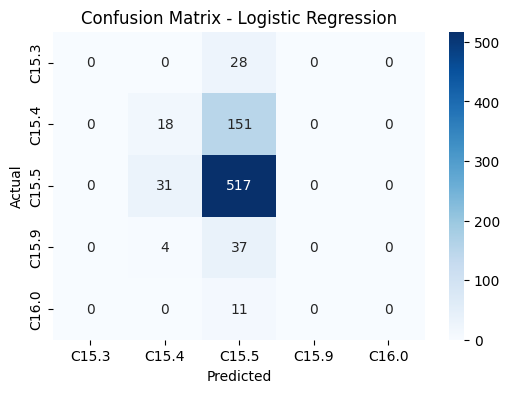


Training Random Forest...

Random Forest:
Accuracy: 0.8883312421580929
Classification Report:
              precision    recall  f1-score   support

       C15.3       0.94      0.54      0.68        28
       C15.4       0.80      0.80      0.80       169
       C15.5       0.93      0.95      0.94       548
       C15.9       0.68      0.61      0.64        41
       C16.0       1.00      1.00      1.00        11

    accuracy                           0.89       797
   macro avg       0.87      0.78      0.81       797
weighted avg       0.89      0.89      0.89       797

Confusion Matrix:
[[ 15   9   4   0   0]
 [  0 136  28   5   0]
 [  0  20 521   7   0]
 [  1   6   9  25   0]
 [  0   0   0   0  11]]


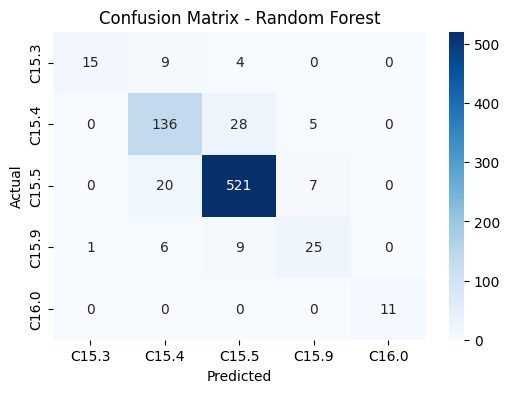


Training Support Vector Machine...

Support Vector Machine:
Accuracy: 0.6875784190715182
Classification Report:
              precision    recall  f1-score   support

       C15.3       0.00      0.00      0.00        28
       C15.4       0.00      0.00      0.00       169
       C15.5       0.69      1.00      0.81       548
       C15.9       0.00      0.00      0.00        41
       C16.0       0.00      0.00      0.00        11

    accuracy                           0.69       797
   macro avg       0.14      0.20      0.16       797
weighted avg       0.47      0.69      0.56       797

Confusion Matrix:
[[  0   0  28   0   0]
 [  0   0 169   0   0]
 [  0   0 548   0   0]
 [  0   0  41   0   0]
 [  0   0  11   0   0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



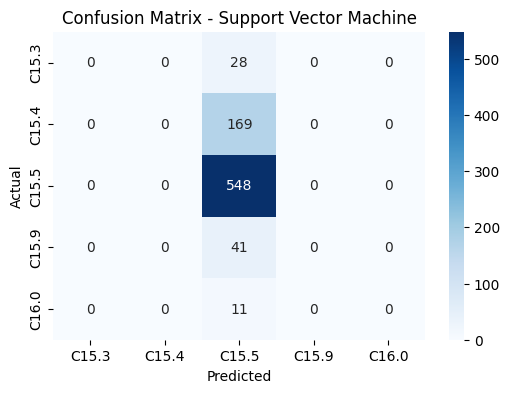


Training K-Nearest Neighbors...

K-Nearest Neighbors:
Accuracy: 0.8569636135508155
Classification Report:
              precision    recall  f1-score   support

       C15.3       0.78      0.50      0.61        28
       C15.4       0.72      0.78      0.75       169
       C15.5       0.93      0.91      0.92       548
       C15.9       0.62      0.63      0.63        41
       C16.0       0.79      1.00      0.88        11

    accuracy                           0.86       797
   macro avg       0.77      0.76      0.76       797
weighted avg       0.86      0.86      0.86       797

Confusion Matrix:
[[ 14  11   3   0   0]
 [  3 131  29   5   1]
 [  1  33 501  11   2]
 [  0   7   8  26   0]
 [  0   0   0   0  11]]


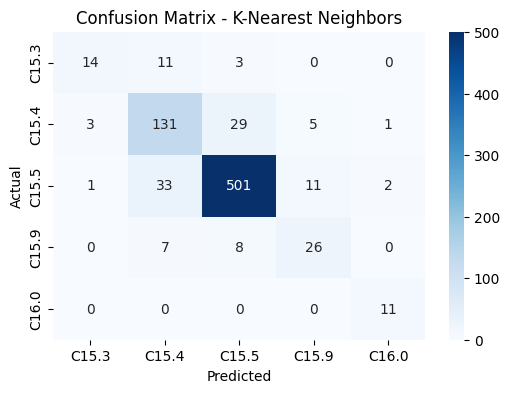


Training Gradient Boosting...

Gradient Boosting:
Accuracy: 0.8695106649937264
Classification Report:
              precision    recall  f1-score   support

       C15.3       0.86      0.68      0.76        28
       C15.4       0.80      0.69      0.74       169
       C15.5       0.90      0.96      0.93       548
       C15.9       0.67      0.54      0.59        41
       C16.0       1.00      0.82      0.90        11

    accuracy                           0.87       797
   macro avg       0.85      0.74      0.78       797
weighted avg       0.86      0.87      0.86       797

Confusion Matrix:
[[ 19   7   2   0   0]
 [  3 117  46   3   0]
 [  0  14 526   8   0]
 [  0   8  11  22   0]
 [  0   0   2   0   9]]


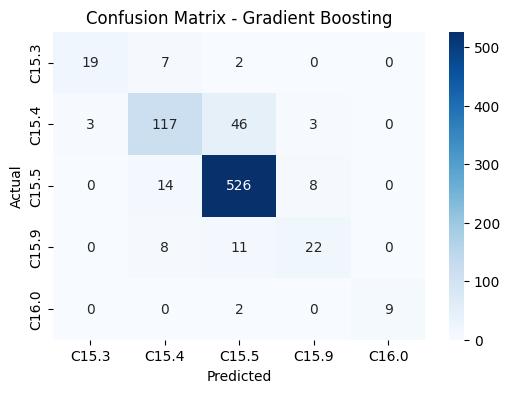


Training XGBoost...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['C15.3' 'C15.4' 'C15.5' 'C15.9' 'C16.0']

In [183]:
# Store results for comparison
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Print evaluation metrics
    print(f"\n{model_name}:")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


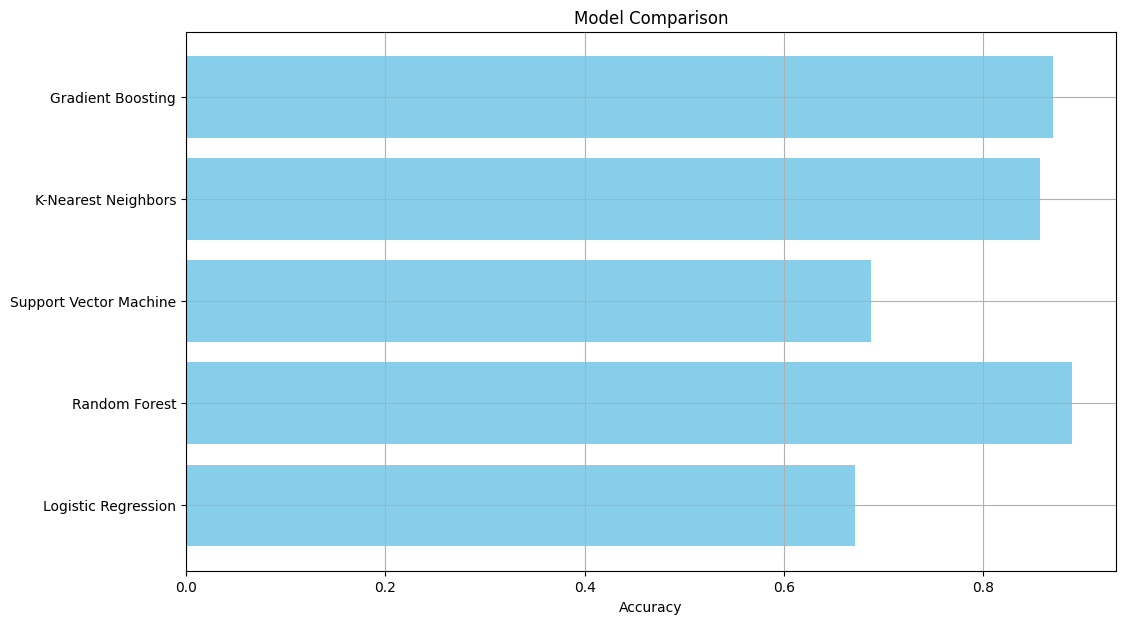

In [184]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(12, 7))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.grid(True)
plt.show()

In [163]:
Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.918444165621079


In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       C15.3       0.95      0.68      0.79        28
       C15.4       0.83      0.86      0.85       169
       C15.5       0.96      0.96      0.96       548
       C15.9       0.71      0.78      0.74        41
       C16.0       1.00      1.00      1.00        11

    accuracy                           0.92       797
   macro avg       0.89      0.86      0.87       797
weighted avg       0.92      0.92      0.92       797



In [169]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [171]:
print(f"Accuracy: { accuracy_score(y_test, y_pred)}")

Accuracy: 0.8569636135508155


In [172]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [173]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [174]:
# Get best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy for Random Forest:", grid_rf.best_score_)


Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy for Random Forest: 0.886770864603377


In [175]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Test Accuracy: 0.8883312421580929
Classification Report for Random Forest:
              precision    recall  f1-score   support

       C15.3       0.94      0.54      0.68        28
       C15.4       0.80      0.80      0.80       169
       C15.5       0.93      0.95      0.94       548
       C15.9       0.68      0.61      0.64        41
       C16.0       1.00      1.00      1.00        11

    accuracy                           0.89       797
   macro avg       0.87      0.78      0.81       797
weighted avg       0.89      0.89      0.89       797



In [176]:
dt = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [177]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [178]:
# Get the best model from grid search
best_dt = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [179]:
y_pred = best_dt.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       C15.3       0.96      0.82      0.88        28
       C15.4       0.83      0.85      0.84       169
       C15.5       0.96      0.95      0.95       548
       C15.9       0.75      0.80      0.78        41
       C16.0       1.00      0.82      0.90        11

    accuracy                           0.92       797
   macro avg       0.90      0.85      0.87       797
weighted avg       0.92      0.92      0.92       797

Accuracy on Test Set: 0.917189460476788
